<a href="https://colab.research.google.com/github/CodeHunterOfficial/DL_20241S/blob/main/Lecture_1_1_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

beta0: 1.2084714478422036
beta1: 1.9702673135384565


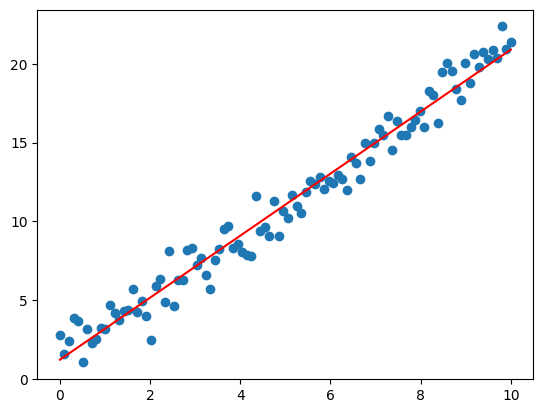

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Генерируем данные
np.random.seed(0)
n = 100
X = np.linspace(0, 10, n)
y = 2 * X + 1 + np.random.randn(n)

# Вычисляем коэффициенты линейной регрессии методом наименьших квадратов
X_mean = np.mean(X)
y_mean = np.mean(y)
n = len(X)

numerator = 0
denominator = 0

for i in range(n):
    numerator += (X[i] - X_mean) * (y[i] - y_mean)
    denominator += (X[i] - X_mean) ** 2

beta1 = numerator / denominator
beta0 = y_mean - beta1 * X_mean

# Выводим результаты
print("beta0:", beta0)
print("beta1:", beta1)

# Строим график линейной регрессии
y_pred = beta0 + beta1 * X
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

beta0: 1.208471447842212
beta1: 1.970267313538454


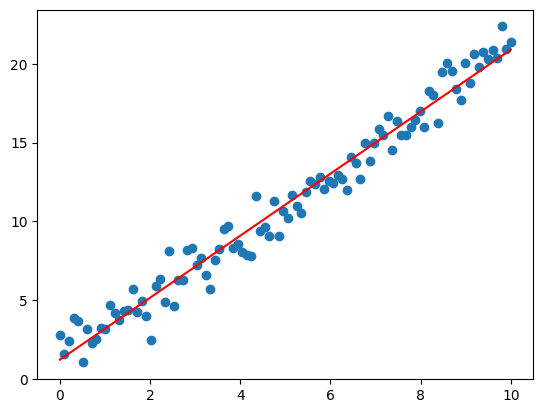

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Генерируем данные
np.random.seed(0)
n = 100
X = np.linspace(0, 10, n)
y = 2 * X + 1 + np.random.randn(n)

# Вычисляем коэффициенты линейной регрессии методом наименьших квадратов
X_matrix = np.vstack([np.ones(n), X]).T
y_matrix = y.reshape(-1, 1)

beta = np.dot(np.linalg.inv(np.dot(X_matrix.T, X_matrix)), np.dot(X_matrix.T, y_matrix))

# Выводим результаты
print("beta0:", beta[0][0])
print("beta1:", beta[1][0])

# Строим график линейной регрессии
y_pred = beta[0][0] + beta[1][0] * X
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

Итоговые веса:
beta0 = 1.2023169482833609
beta1 = 1.9711927052179845


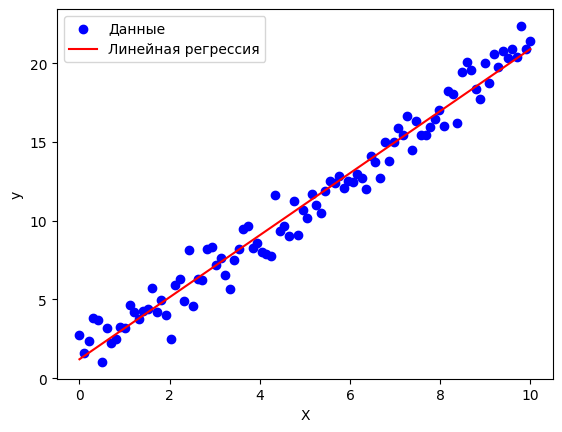

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Генерируем данные
np.random.seed(0)
n = 100
X = np.linspace(0, 10, n)
y = 2 * X + 1 + np.random.randn(n)
# Инициализация начальных весов
beta0 = 0
beta1 = 0
# Гиперпараметры
learning_rate = 0.01
n_iterations = 1000
# Шаг 1: Найдите частные производные функции стоимости
# 𝐸 по переменным 𝛽_0 и 𝛽_1.
def partial_derivative_beta0(X, y, beta0, beta1):
    n = len(X)
    diff = y - (beta0 + beta1 * X)
    return (-2/n) * np.sum(diff)
def partial_derivative_beta1(X, y, beta0, beta1):
    n = len(X)
    diff = y - (beta0 + beta1 * X)
    return (-2/n) * np.sum(diff * X)

# Шаг 2: Выразите изменение функции стоимости Δ𝐸 через изменения
# вектора весов Δ𝐵.
def delta_E(X, y, beta0, beta1, delta_beta0, delta_beta1):
    n = len(X)
    diff = y - (beta0 + beta1 * X)
    delta_E_beta0 = (1/n) * np.sum(diff * delta_beta0)
    delta_E_beta1 = (1/n) * np.sum(diff * X * delta_beta1)
    return delta_E_beta0 + delta_E_beta1
# Обновление весов с помощью градиентного спуска
for i in range(n_iterations):
    # Шаг 3: Определите направление спуска, используя найденные частные производные.
    delta_beta0 = partial_derivative_beta0(X, y, beta0, beta1)
    delta_beta1 = partial_derivative_beta1(X, y, beta0, beta1)

    # Шаг 4: Обновите веса с учетом скорости обучения.
    beta0 -= learning_rate * delta_beta0
    beta1 -= learning_rate * delta_beta1
# Вывод результатов
print("Итоговые веса:")
print("beta0 =", beta0)
print("beta1 =", beta1)
# Построение графика линейной регрессии
plt.scatter(X, y, color='blue', label='Данные')
plt.plot(X, beta0 + beta1 * X, color='red', label='Линейная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

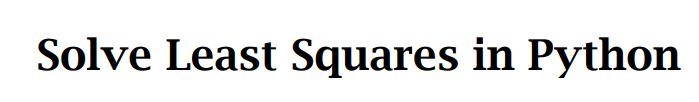

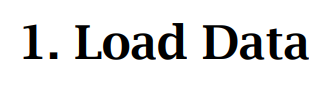

In [4]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print('shape of x_train: ' + str(x_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of y_test: ' + str(y_test.shape))

57026/57026 [==============================] - 0s 0us/step
shape of x_train: (404, 13)
shape of x_test: (102, 13)
shape of y_train: (404,)
shape of y_test: (102,)


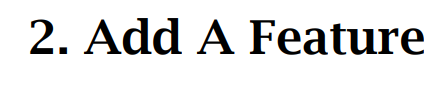

In [5]:
import numpy
n, d = x_train.shape
xbar_train = numpy.concatenate((x_train, numpy.ones((n, 1))),
axis=1)
print('shape of x_train: ' + str(x_train.shape))
print('shape of xbar_train: ' + str(xbar_train.shape))

shape of x_train: (404, 13)
shape of xbar_train: (404, 14)


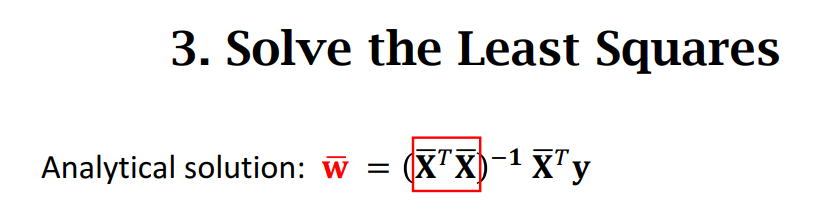

In [6]:
xx = numpy.dot(xbar_train.T, xbar_train)
xx_inv = numpy.linalg.pinv(xx)
xy = numpy.dot(xbar_train.T, y_train)
w = numpy.dot(xx_inv, xy)

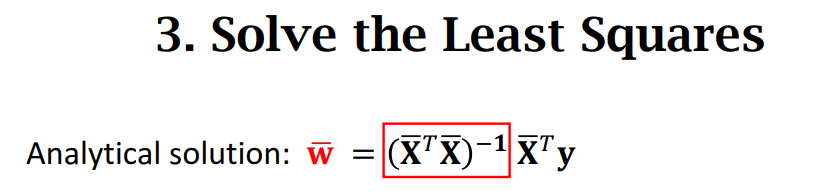

In [7]:
xx = numpy.dot(xbar_train.T, xbar_train)
xx_inv = numpy.linalg.pinv(xx)
xy = numpy.dot(xbar_train.T, y_train)
w = numpy.dot(xx_inv, xy)

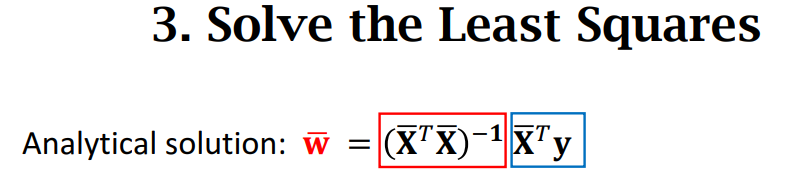

In [8]:
xx = numpy.dot(xbar_train.T, xbar_train)
xx_inv = numpy.linalg.pinv(xx)
xy = numpy.dot(xbar_train.T, y_train)
w = numpy.dot(xx_inv, xy)

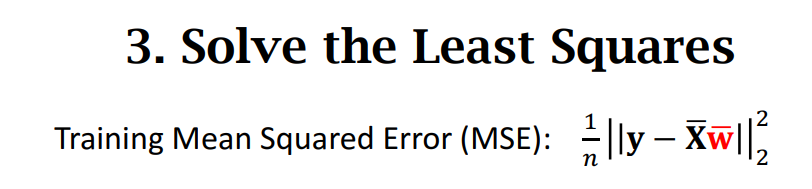

In [9]:
y_lsr = numpy.dot(xbar_train, w)
diff = y_lsr - y_train
mse = numpy.mean(diff * diff)
print('Train MSE: ' + str(mse))

Train MSE: 22.004800838348142


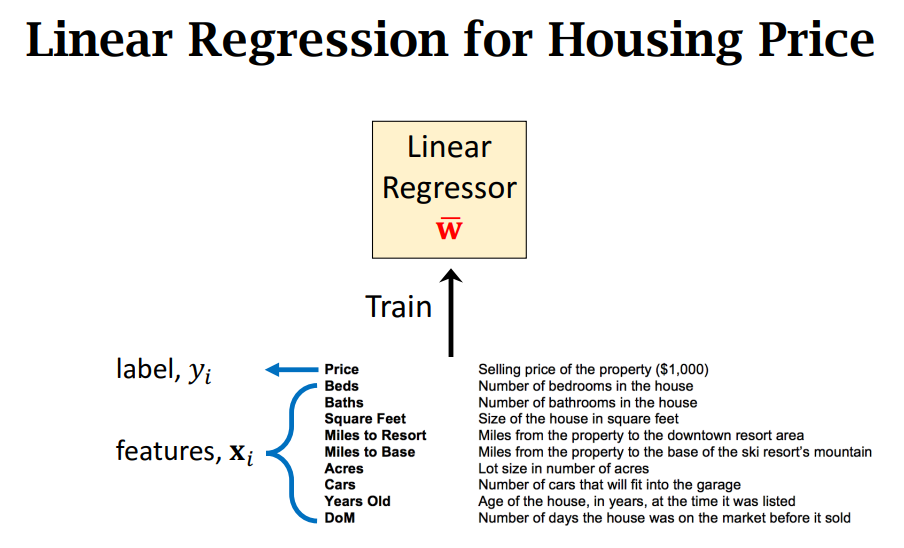

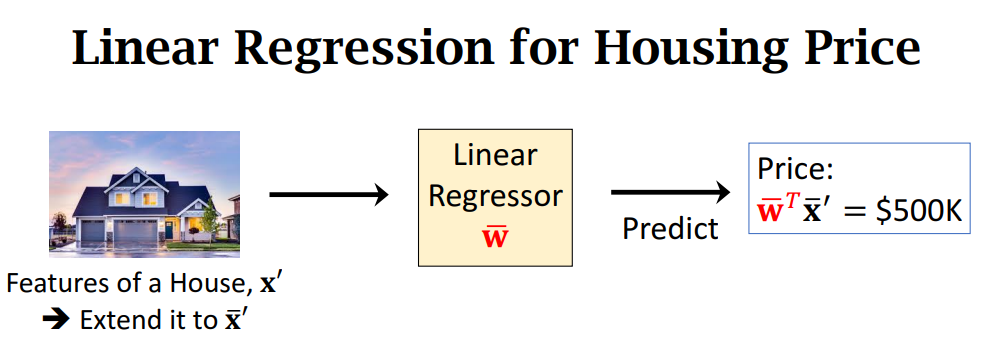

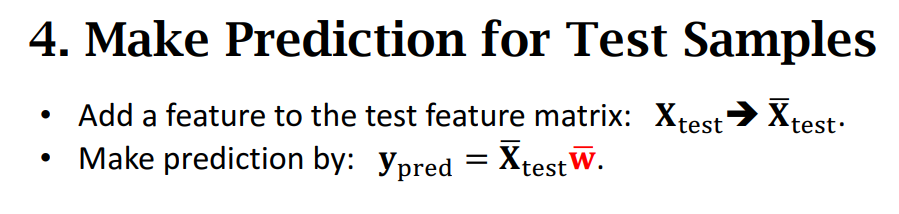

In [10]:
n_test, _ = x_test.shape
xbar_test = numpy.concatenate((x_test, numpy.ones((n_test, 1))), axis=1)
y_pred = numpy.dot(xbar_test, w)

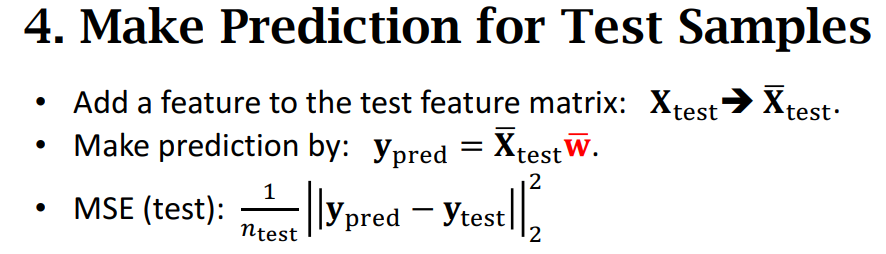

In [11]:
# mean squared error (testing)
diff = y_pred - y_test
mse = numpy.mean(diff * diff)
print('Test MSE: ' + str(mse))

Test MSE: 23.195599256425602


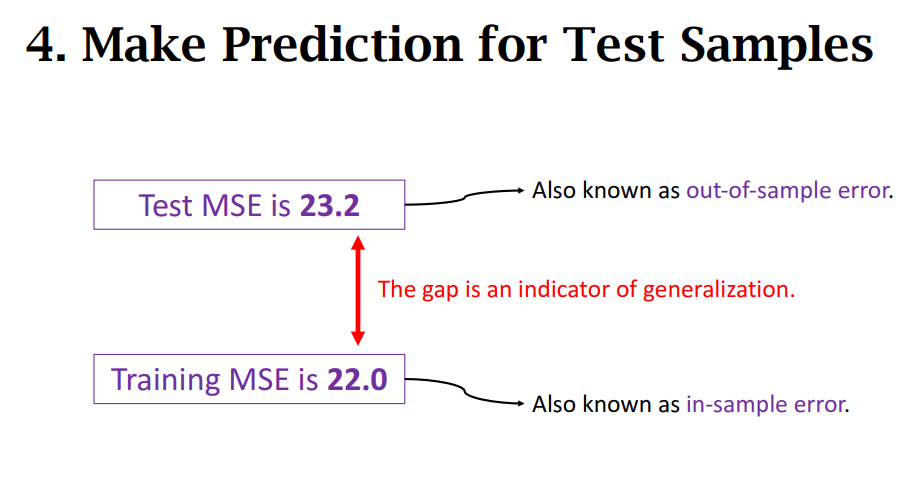

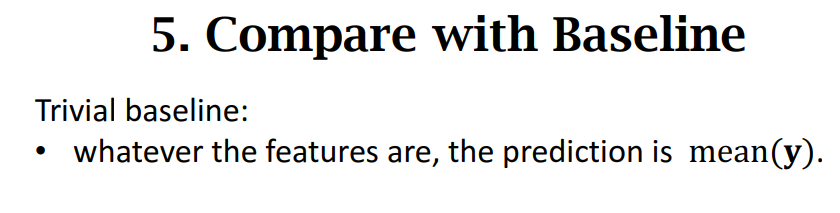

In [12]:
y_mean = numpy.mean(y_train)
diff = y_pred - y_mean
mse = numpy.mean(diff * diff)
print('Test MSE: ' + str(mse))

Test MSE: 57.382976385361175
